In [18]:
import os
import torch
from torch import nn
import re
import jieba
import collections

首先进行数据的处理，最后要求输出长度一致的batch用于训练

In [8]:
labellist = ["暴雨洪涝","冰雹","城市内涝","大风","干旱","雷电","台风"]

def read_data(data_dir):
    data, labels = [], []
    # 总共有七种类型
    for i in range(7):
        folder_name = os.path.join(data_dir,labellist[i])
        for file in os.listdir(folder_name):
            with open(os.path.join(folder_name, file), 'rb') as f:
                review = f.read().decode('utf-8').replace('\n', '')
                data.append(review)
                labels.append(i)
    
    return data,labels
        
data_dir = "..\KG-lab1\实验1-语料"
train_data = read_data(data_dir)
for x, y in zip(train_data[0][:3], train_data[1][:3]):
    print(y)
    print(x)

0
　　记者2日从国家防汛抗旱总指挥部办公室获悉，今年以来全国因洪涝灾害死亡377人、失踪94人。　　据国家防办最新统计，今年以来的洪涝灾害共造成28省(区、市)5458万人受灾，因灾死亡377人、失踪94人，农作物受灾4581千公顷，倒塌房屋16万间。与2000年以来同期相比，洪涝灾害受灾人口偏少五成，死亡人口偏少七成，农作物受灾面积偏少五成，倒塌房屋偏少八成多。与去年同期相比，受灾人口、死亡人口、直接经济损失偏少四成，农作物受灾面积均偏少五成，倒塌房屋偏少六成。　　刚刚过去的8月，全国共发生2次较强降水过程，降水量与常年基本持平但分布不均，有21省(区、市)590万人遭受洪涝灾害，其中贵州、重庆、福建、浙江受灾较重。(记者林晖)
0
　　中新网6月13日电 据民政部网站消息，民政部国家减灾办发布2016年5月份全国自然灾害基本情况，6－10日和19－21日南方降水过程影响范围广、灾害程度深。据统计，洪涝和地质灾害共造成全国17个省(自治区、直辖市)和新疆生产建设兵团629.4万人次受灾，因灾死亡失踪101人，紧急转移安置18.9万人次；倒塌房屋1万间，损坏房屋9.6万间；直接经济损失90.3亿元，南方12省(自治区、直辖市)各项灾情指标占全国9成以上，福建、湖南和广东等地灾情较重。总体看，5月份洪涝和地质灾害造成的损失较2011年以来同期明显偏轻，受灾人口、农作物受灾情况、倒损房屋数量和直接经济损失均为2011年以来次低值(仅高于2011年)。此外，5月27日南海热带低压在广东省阳江市阳东区沿海登陆，登陆时中心附近最大风力7级，造成粤、桂两省1人死亡，2.5万人紧急转移安置，为今年首个登陆我国的热带气旋。　　
0



In [3]:
len(train_data[0]),len(train_data[1])

(6403, 6403)

In [13]:
def tokenize(train_data):
    word_all = []
    for text in train_data[0]:
        word_one = []
        #用正则表达式去掉标点空格和怪异符号
        text = re.sub("[\r|\n|\\s!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”？，！【】（）、。：；’‘……￥·]+", "", text)
        #用正则表达式去掉了数字（在这个任务中作用不大）
        text = re.sub("[0-9]","",text)
        #结巴分词进行分词，tokenize
        cut = jieba.lcut(text)
        for word in cut:
            word_one.append(word)
        word_all.append(word_one)
        
    return word_all
        
    
        
word_all = tokenize(train_data)
len(word_all)

6403

In [15]:
# 打印前两句对应的词汇
word_all[0:2]

[['年',
  '以来',
  '全国',
  '因',
  '洪涝灾害',
  '死亡',
  '人',
  '失踪',
  '人',
  '年月日',
  '中国',
  '新闻网',
  '记者',
  '日',
  '从',
  '国家',
  '防汛',
  '抗旱',
  '总指挥部',
  '办公室',
  '获悉',
  '今年以来',
  '全国',
  '因',
  '洪涝灾害',
  '死亡',
  '人',
  '失踪',
  '人据',
  '国家',
  '防办',
  '最新',
  '统计',
  '今年以来',
  '的',
  '洪涝灾害',
  '共',
  '造成',
  '省区市',
  '万人',
  '受灾',
  '因灾',
  '死亡',
  '人',
  '失踪',
  '人',
  '农作物',
  '受灾',
  '千公顷',
  '倒塌',
  '房屋',
  '万间',
  '与',
  '年',
  '以来',
  '同期相比',
  '洪涝灾害',
  '受灾人口',
  '偏少',
  '五成',
  '死亡',
  '人口',
  '偏少',
  '七成',
  '农作物',
  '受灾面积',
  '偏少',
  '五成',
  '倒塌',
  '房屋',
  '偏少',
  '八成',
  '多',
  '与',
  '去年',
  '同期相比',
  '受灾人口',
  '死亡',
  '人口',
  '直接',
  '经济损失',
  '偏少',
  '四成',
  '农作物',
  '受灾面积',
  '均',
  '偏少',
  '五成',
  '倒塌',
  '房屋',
  '偏少',
  '六成',
  '刚刚',
  '过去',
  '的',
  '月',
  '全国',
  '共',
  '发生',
  '次',
  '较',
  '强降水',
  '过程',
  '降水量',
  '与',
  '常年',
  '基本',
  '持平',
  '但',
  '分布',
  '不均',
  '有',
  '省区市',
  '万人',
  '遭受',
  '洪涝灾害',
  '其中',
  '贵州',
  '重庆',
  '福建',
  '浙江',
  '受灾',
  '较',
 

In [16]:
class Vocab:  #@save
    """文本词表"""
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None:
            reserved_tokens = []
        # 按出现频率排序
        counter = count_corpus(tokens)
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1],
                                   reverse=True)
        # 未知词元的索引为0
        self.idx_to_token = ['<unk>'] + reserved_tokens
        self.token_to_idx = {token: idx
                             for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1

    def __len__(self):
        return len(self.idx_to_token)

    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]

    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]

    @property
    def unk(self):  # 未知词元的索引为0
        return 0

    @property
    def token_freqs(self):
        return self._token_freqs

def count_corpus(tokens):  #@save
    """统计词元的频率"""
    # 这里的tokens是1D列表或2D列表
    if len(tokens) == 0 or isinstance(tokens[0], list):
        # 将词元列表展平成一个列表
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)

In [19]:
# 构建词表
vocab = Vocab(word_all)
# 查看word与index的一一对应关系
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('的', 1), ('日', 2), ('月', 3), ('受灾', 4), ('人', 5), ('在', 6), ('等', 7), ('和', 8), ('造成', 9)]


In [21]:
for i in [0, 2]:
    # 将文本转化为数字列表
    print('文本:', word_all[i])
    print('索引:', vocab[word_all[i]])

文本: ['年', '以来', '全国', '因', '洪涝灾害', '死亡', '人', '失踪', '人', '年月日', '中国', '新闻网', '记者', '日', '从', '国家', '防汛', '抗旱', '总指挥部', '办公室', '获悉', '今年以来', '全国', '因', '洪涝灾害', '死亡', '人', '失踪', '人据', '国家', '防办', '最新', '统计', '今年以来', '的', '洪涝灾害', '共', '造成', '省区市', '万人', '受灾', '因灾', '死亡', '人', '失踪', '人', '农作物', '受灾', '千公顷', '倒塌', '房屋', '万间', '与', '年', '以来', '同期相比', '洪涝灾害', '受灾人口', '偏少', '五成', '死亡', '人口', '偏少', '七成', '农作物', '受灾面积', '偏少', '五成', '倒塌', '房屋', '偏少', '八成', '多', '与', '去年', '同期相比', '受灾人口', '死亡', '人口', '直接', '经济损失', '偏少', '四成', '农作物', '受灾面积', '均', '偏少', '五成', '倒塌', '房屋', '偏少', '六成', '刚刚', '过去', '的', '月', '全国', '共', '发生', '次', '较', '强降水', '过程', '降水量', '与', '常年', '基本', '持平', '但', '分布', '不均', '有', '省区市', '万人', '遭受', '洪涝灾害', '其中', '贵州', '重庆', '福建', '浙江', '受灾', '较', '重', '记者', '林晖']
索引: [155, 74, 413, 157, 118, 18, 5, 95, 5, 24, 29, 43, 12, 2, 63, 135, 99, 45, 931, 381, 169, 690, 413, 157, 118, 18, 5, 95, 2736, 135, 710, 496, 62, 690, 1, 118, 125, 9, 1344, 15, 4, 147, 18, 5, 95, 5, 21, 4, 80, 60, 30, 235

In [ ]:
def truncate_pad(line, num_steps, padding_token):
    """截断或填充文本序列"""
    if len(line) > num_steps:
        return line[:num_steps]  # 截断
    return line + [padding_token] * (num_steps - len(line))  # 填充

In [26]:
# 对其进行截断和填充
num_steps = 100 # 序列长度
train_features = torch.tensor([truncate_pad(
    vocab[line], num_steps, vocab['<pad>']) for line in word_all])
print(train_features.shape)

torch.Size([6403, 100])


In [41]:
def load_array(data_arrays, batch_size, is_train=True):  
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [24]:
# 创建小批量
train_iter = load_array((train_features,
    torch.tensor(train_data[1])), 64)

for X, y in train_iter:
    print('X:', X.shape, ', y:', y.shape)
    break
print('小批量数目：', len(train_iter))

X: torch.Size([64, 100]) , y: torch.Size([64])
小批量数目： 101


下面定义所用的模型

In [25]:
# 定义双向的RNN
class BiRNN(nn.Module):
    def __init__(self, vocab_size, embed_size, num_hiddens,
                 num_layers, **kwargs):
        super(BiRNN, self).__init__(**kwargs)
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # 将bidirectional设置为True以获取双向循环神经网络
        self.encoder = nn.LSTM(embed_size, num_hiddens, num_layers=num_layers,
                                bidirectional=True)
        # 输出7个不同的类别
        self.decoder = nn.Linear(4 * num_hiddens, 7)

    def forward(self, inputs):
        # inputs的形状是（批量大小，时间步数）
        # 因为长短期记忆网络要求其输入的第一个维度是时间维，
        # 所以在获得词元表示之前，输入会被转置。
        # 输出形状为（时间步数，批量大小，词向量维度）
        embeddings = self.embedding(inputs.T)
        self.encoder.flatten_parameters()
        # 返回上一个隐藏层在不同时间步的隐状态，
        # outputs的形状是（时间步数，批量大小，2*隐藏单元数）
        outputs, _ = self.encoder(embeddings)
        # 连结初始和最终时间步的隐状态，作为全连接层的输入，
        # 其形状为（批量大小，4*隐藏单元数）
        encoding = torch.cat((outputs[0], outputs[-1]), dim=1)
        outs = self.decoder(encoding)
        return outs

In [27]:
embed_size, num_hiddens, num_layers = 100, 100, 2
# 两层的双向RNN
devices = d2l.try_all_gpus()
net = BiRNN(len(vocab), embed_size, num_hiddens, num_layers)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
    if type(m) == nn.LSTM:
        for param in m._flat_weights_names:
            if "weight" in param:
                nn.init.xavier_uniform_(m._parameters[param])
net.apply(init_weights);

In [ ]:
def train_batch(net, features, labels, loss, trainer, devices,
                     split_f=d2l.split_batch):
    """用多GPU进行小批量训练"""
    X_shards, y_shards = split_f(features, labels, devices)
    with autograd.record():
        pred_shards = [net(X_shard) for X_shard in X_shards]
        ls = [loss(pred_shard, y_shard) for pred_shard, y_shard
              in zip(pred_shards, y_shards)]
    for l in ls:
        l.backward()
    # True标志允许使用过时的梯度，这很有用（例如，在微调BERT中）
    trainer.step(labels.shape[0], ignore_stale_grad=True)
    train_loss_sum = sum([float(l.sum()) for l in ls])
    train_acc_sum = sum(d2l.accuracy(pred_shard, y_shard)
                        for pred_shard, y_shard in zip(pred_shards, y_shards))
    return train_loss_sum, train_acc_sum

def train(net, train_iter, test_iter, loss, trainer, num_epochs,
               devices=d2l.try_all_gpus(), split_f=d2l.split_batch):
    """用多GPU进行模型训练"""
    timer, num_batches = d2l.Timer(), len(train_iter)
    animator = d2l.Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0, 1],
                            legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        # 4个维度：储存训练损失，训练准确度，实例数，特点数
        metric = d2l.Accumulator(4)
        for i, (features, labels) in enumerate(train_iter):
            timer.start()
            l, acc = train_batch_ch13(
                net, features, labels, loss, trainer, devices, split_f)
            metric.add(l, acc, labels.shape[0], labels.size)
            timer.stop()
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (metric[0] / metric[2], metric[1] / metric[3],
                              None))
        test_acc = d2l.evaluate_accuracy_gpus(net, test_iter, split_f)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {metric[0] / metric[2]:.3f}, train acc '
          f'{metric[1] / metric[3]:.3f}, test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec on '
          f'{str(devices)}')

loss 0.020, train acc 0.995, test acc 0.996
242.6 examples/sec on [device(type='cuda', index=0)]


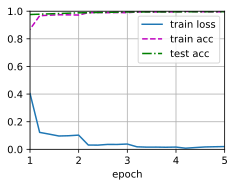

In [32]:
lr, num_epochs = 0.01, 5
trainer = torch.optim.Adam(net.parameters(), lr=lr)
loss = nn.CrossEntropyLoss(reduction="none")
train(net, train_iter, train_iter, loss, trainer, num_epochs,
    devices)

In [39]:
def predict(net, vocab, sequence ,labellist):
    """预测文本序列的所报告的自然灾害"""
    sequence = torch.tensor(vocab[sequence.split()], device=d2l.try_gpu())
    label = torch.argmax(net(sequence.reshape(1, -1)), dim=1)
    return labellist[label]

# 用几个vocab中词，手动分词组合成一个句子来尝试一下
print(predict(net, vocab, '下雨 暴雨 天气 受灾 严重',labellist))
print(predict(net, vocab, '安徽 经济 损失 风暴 受灾',labellist))
print(predict(net, vocab, '田地 干涸 天气 加剧 湖北',labellist))

城市内涝
台风
干旱
